<a href="https://colab.research.google.com/github/Aayushi4925/cardiovasular/blob/main/cardiovascular_risk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive  #mounting the drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline
import warnings; warnings.simplefilter('ignore')

In [3]:
path = '/content/drive/MyDrive/data_cardiovascular_risk.csv'   #giving path for csv file
df = pd.read_csv(path)

In [4]:
df.shape   #number of rows and columns in dataset

(3390, 17)

In [5]:
pd.set_option('display.max_columns',None)  #displaying all the columns of dataset
df.head()  #first five rows

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [6]:
pd.set_option('display.max_columns',None)
df.tail()  #last five rows of dataset

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
3385,3385,60,1.0,F,NO,0.0,0.0,0,0,0,261.0,123.5,79.0,29.28,70.0,103.0,0
3386,3386,46,1.0,F,NO,0.0,0.0,0,0,0,199.0,102.0,56.0,21.96,80.0,84.0,0
3387,3387,44,3.0,M,YES,3.0,0.0,0,1,0,352.0,164.0,119.0,28.92,73.0,72.0,1
3388,3388,60,1.0,M,NO,0.0,NaN,0,1,0,191.0,167.0,105.0,23.01,80.0,85.0,0
3389,3389,54,3.0,F,NO,0.0,0.0,0,0,0,288.0,124.0,77.0,29.88,79.0,92.0,0


In [7]:
df.isnull().sum()   #checking null values in the dataset

id                   0
age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

In [8]:
df.info()   #info returns datatype and non null counts in dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

In [9]:
df_temp = df.copy()

In [10]:
numerical_features = [i for i in df_temp if df_temp[i].dtypes!='O']

In [11]:
categorical_features = [i for i in df_temp if df_temp[i].dtypes =='O']

In [12]:
numerical_features

['id',
 'age',
 'education',
 'cigsPerDay',
 'BPMeds',
 'prevalentStroke',
 'prevalentHyp',
 'diabetes',
 'totChol',
 'sysBP',
 'diaBP',
 'BMI',
 'heartRate',
 'glucose',
 'TenYearCHD']

In [13]:
categorical_features

['sex', 'is_smoking']

In [16]:
for i in categorical_features:
  print(df[i].value_counts())

F    1923
M    1467
Name: sex, dtype: int64
NO     1703
YES    1687
Name: is_smoking, dtype: int64


In [17]:
df_temp.describe()
'''Tot Chol: total cholesterol level (Continuous)
• Sys BP: systolic blood pressure (Continuous)
• Dia BP: diastolic blood pressure (Continuous)
• BMI: Body Mass Index (Continuous)
• Heart Rate: heart rate (Continuous - In medical research, variables such as heart rate though in
fact discrete, yet are considered continuous because of large number of possible values.)
• Glucose: glucose level (Continuous)'''

,id,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3390.000000,3390.000000,3303.000000,3368.000000,3346.000000,3390.000000,3390.000000,3390.000000,3352.000000,3390.00000,3390.000000,3376.000000,3389.000000,3086.000000,3390.000000
mean,1694.500000,49.542183,1.970936,9.069477,0.029886,0.006490,0.315339,0.025664,237.074284,132.60118,82.883038,25.794964,75.977279,82.086520,0.150737
std,978.753033,8.592878,1.019081,11.879078,0.170299,0.080309,0.464719,0.158153,45.247430,22.29203,12.023581,4.115449,11.971868,24.244753,0.357846
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.50000,48.000000,15.960000,45.000000,40.000000,0.000000
25%,847.250000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.00000,74.500000,23.020000,68.000000,71.000000,0.000000
50%,1694.500000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.50000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,2541.750000,56.000000,3.000000,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.00000,90.000000,28.040000,83.000000,87.000000,0.000000
max,3389.000000,70.000000,4.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.00000,142.500000,56.800000,143.000000,394.000000,1.000000


In [19]:
df_temp['education'].unique()

array([ 2.,  4.,  1.,  3., nan])

In [26]:
nominal = ['BPMeds','prevalentStroke','prevalentHyp','diabetes']
nominal

['BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes']

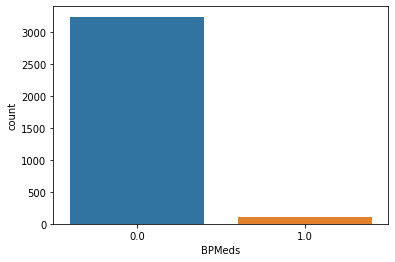

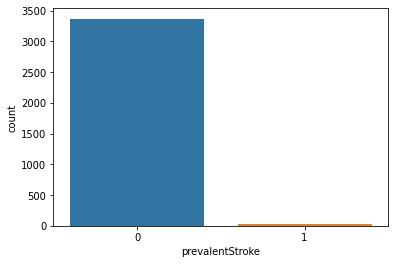

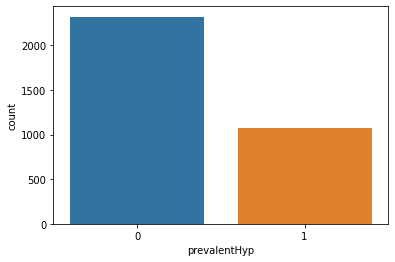

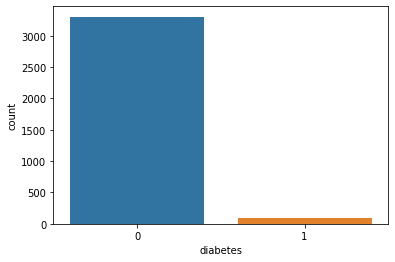

In [29]:
for i in nominal:
  sns.countplot(x=i,data=df_temp)
  df_temp[i].value_counts()
  plt.show()

In [31]:
yes=0
no=0
for i,j in zip(df_temp['TenYearCHD'],df_temp['prevalentHyp']):
    if(i==1 and j==1):
        yes+=1
    elif(i==0 and j==1):
        no+=1
print('People was with hypertensive and risk for coronary risk',yes)
print('People was with hypertensive but no risk for coronary risk',no)

People was with hypertensive and risk for coronary risk 255
People was with hypertensive but no risk for coronary risk 814


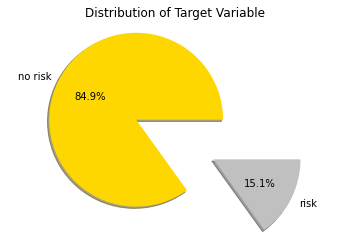

In [54]:

labels = 'no risk', 'risk'
sizes = df_temp['TenYearCHD'].value_counts()
col = ['gold','silver']
explode = [1,0]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', explode = explode, colors = col,
        shadow=True)
plt.title("Distribution of Target Variable")
plt.plot()
plt.show()